#### 树回归-CART

In [3]:
!ls datasets/

abalone.txt	  email		    horseColicTest.txt	    svm_RBF2.txt
dating_test1.txt  ex0.txt	    horseColicTraining.txt  svm_RBF.txt
dating_test.txt   ex1.txt	    housing.csv		    svm.txt
digits		  horse-colic.data  play


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [29]:
def load_data(file_name):
    data = []
    #y = []
    with open(file_name) as file:
        for line in file.readlines():
            curr_line = line.strip().split("\t")
            curr_line = [float(e) for e in curr_line]
            #x0, y0 = curr_line[:-1], curr_line[-1]
            #X.append(x0)
            data.append(curr_line)
    return data

In [52]:
# 按照指定列切分数据
def split_dataset(X, feature_idx, value):
    ldata, rdata = [], []
    for data in dataset:
        if data[feature_idx] < value:
            ldata.append(data)
        else:
            rdata.append(data)
    return ldata, rdata

In [6]:
a=np.mat(np.eye(4))

In [7]:
a

matrix([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

In [21]:
a[np.nonzero(a[:,0]>0.5)[0]][0]

matrix([[1., 0., 0., 0.]])

In [22]:
a[np.nonzero(a[:,0]<=0.5)[0]]

matrix([[0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

In [12]:
split_dataset_by_col(a,1,0.5)

(matrix([[0., 1., 0., 0.]]), matrix([[1., 0., 0., 0.]]))

In [51]:
def choose_best_feature(dataset, fleaf, ferr, opt):
    ''' 选取最佳分割特征和特征值
    dataset: 待划分的数据集
    fleaf: 创建叶子节点的函数
    ferr: 计算数据误差的函数
    opt: 回归树参数.
        err_tolerance: 最小误差下降值;
        n_tolerance: 数据切分最小样本数
    '''
    dataset = np.array(dataset)
    m, n = dataset.shape
    err_tolerance, n_tolerance = opt['err_tolerance'], opt['n_tolerance']
    err = ferr(dataset)
    best_feat_idx, best_feat_val, best_err = 0, 0, float('inf')
    # 遍历所有特征
    for feat_idx in range(n - 1):
        values = dataset[:, feat_idx]
        # 遍历所有特征值
        for val in values:
            # 按照当前特征和特征值分割数据
            ldata, rdata = split_dataset(dataset.tolist(), feat_idx, val)
            if len(ldata) < n_tolerance or len(rdata) < n_tolerance:
                # 如果切分的样本量太小
                continue
            # 计算误差
            new_err = ferr(ldata) + ferr(rdata)
            if new_err < best_err:
                best_feat_idx = feat_idx
                best_feat_val = val
                best_err = new_err
    # 如果误差变化并不大归为一类
    if abs(err - best_err) < err_tolerance:
        return None, fleaf(dataset)
    # 检查分割样本量是不是太小
    ldata, rdata = split_dataset(dataset.tolist(), best_feat_idx,
                                 best_feat_val)
    if len(ldata) < n_tolerance or len(rdata) < n_tolerance:
        return None, fleaf(dataset)
    return best_feat_idx, best_feat_val

In [36]:
dataset=load_data("datasets/ex0_9.txt")
dataset[:10]

[[1.0, 0.409175, 1.88318],
 [1.0, 0.182603, 0.063908],
 [1.0, 0.663687, 3.042257],
 [1.0, 0.517395, 2.305004],
 [1.0, 0.013643, -0.067698],
 [1.0, 0.469643, 1.662809],
 [1.0, 0.725426, 3.275749],
 [1.0, 0.39435, 1.118077],
 [1.0, 0.50776, 2.095059],
 [1.0, 0.237395, 1.181912]]

In [31]:
type(dataset)

list

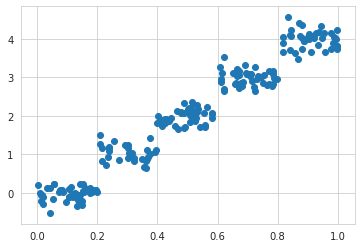

In [37]:
dataset = np.array(dataset)
# 绘制散点
plt.scatter(dataset[:, 1], dataset[:, 2])

In [40]:
def fleaf(dataset):
    ''' 计算给定数据的叶节点数值, 这里为均值
    '''
    dataset = np.array(dataset)
    return np.mean(dataset[:, -1])

def ferr(dataset):
    ''' 计算数据集的误差.
    '''
    dataset = np.array(dataset)
    m, _ = dataset.shape
    return np.var(dataset[:, -1])*dataset.shape[0]

In [50]:
def create_tree(dataset, fleaf, ferr, opt=None):
    ''' 递归创建树结构
    dataset: 待划分的数据集
    fleaf: 创建叶子节点的函数
    ferr: 计算数据误差的函数
    opt: 回归树参数.
        err_tolerance: 最小误差下降值;
        n_tolerance: 数据切分最小样本数
    '''
    if opt is None:
        opt = {'err_tolerance': 1, 'n_tolerance': 4}
    # 选择最优化分特征和特征值
    feat_idx, value = choose_best_feature(dataset, fleaf, ferr, opt)

    # 触底条件
    if feat_idx is None:
        return value
    # 创建回归树
    tree = {'feat_idx': feat_idx, 'feat_val': value}
    # 递归创建左子树和右子树
    ldata, rdata = split_dataset(dataset, feat_idx, value)
    ltree = create_tree(ldata, fleaf, ferr, opt)
    rtree = create_tree(rdata, fleaf, ferr, opt)
    tree['left'] = ltree
    tree['right'] = rtree
    return tree

In [53]:
tree = create_tree(dataset,
                   fleaf,
                   ferr,
                   opt={
                       'n_tolerance': 4,
                       'err_tolerance': 1
                   })
tree

RecursionError: maximum recursion depth exceeded in comparison